# KNN, exemplo com explicação

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
knn = KNeighborsClassifier(n_neighbors = 6) ##Classificador

## Análise exploratória dos dados

In [140]:
print(type(dataset))

print(dataset.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


O tipo Bunch de dados funciona como um dicionário, com pares key-value. As colunas são do tipo numpy array:

In [141]:
type(dataset.target)

numpy.ndarray

In [142]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [143]:
print(dataset.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Divisão dos grupos de teste e de treinamento

In [144]:
X = dataset.data
y = dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [145]:
X_train , X_test, y_train, y_test = train_test_split(X, y, stratify = y)

O que foi feito acima:

Na primeira célula, chamamos os dados de X e os targets (o que vamos prever) de y. X e y são exemplos de **labeled data**, dados já com sua categoria lá.

Logo após, usamos a função train_test_split para dividir nossas amostras de treinamento e de teste. Desse modo, podemos avaliar nosso modelo sem o viés presente em avaliar na amostra de treino. Como não especificamos tamanhos da amostra, a função por default coloca 25% para teste e 75% para treino. O parâmetro *stratify* define como vai ser a estratificação da amostra. Por default, não há um padrão e fica aleatório, mas stratify = y garante que temos na nossas amostras tenham a mesma proporção de categorias.

## Fitando o modelo

Agora que temos nossas amostras devidamente separadas, vamos rodar o algoritmo de KNN. Para isso, basta chamar a classe que chamamos de knn e aplicar o método .fit()

In [146]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

Agora que temos nosso modelo fitado, podemos avaliar ele na amostra de teste

In [147]:
knn.score(X_test, y_test)

0.9473684210526315

In [148]:
knn.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [149]:
from sklearn.metrics import confusion_matrix
y_pred = knn.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 11]], dtype=int64)

Vemos aqui que o modelo acertou tudo nessa amostra de teste pequena

In [150]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, stratify = y)

In [152]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)


0.9333333333333333


array([[35,  0,  0],
       [ 0, 34,  1],
       [ 0,  6, 29]], dtype=int64)

Mas com uma amostra de treino menor ele não se deu tão bem

## Qual o melhor k?

Os resultados vistos acima são para o algoritmo vendo os 6 vizinhos mais próximos, k = 6. Mas será que esse modelo é complexo o suficiente? Complexo demais? Para fins didáticos, vejamos como os scores se comportam com diferentes valores de k

In [27]:
X_train , X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [30]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

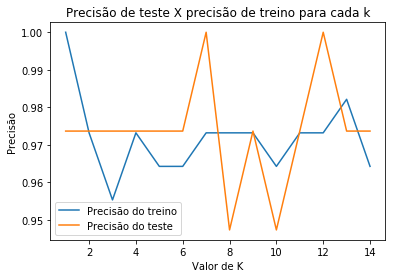

In [32]:
plt.title('Precisão de teste X precisão de treino para cada k')
plt.plot(neighbors, train_accuracy, label = 'Precisão do treino')
plt.plot(neighbors, test_accuracy, label = 'Precisão do teste')
plt.legend()
plt.xlabel('Valor de K')
plt.ylabel('Precisão')
plt.yscale()
plt.show()



# Regressão Linear

In [120]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

Com regressão queremos achar uma relação linear que explique a variável de interesse

In [121]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Digamos que queremos prever petal length com base em petal width

In [122]:
X = pd.DataFrame(data = X, columns = dataset.feature_names) #pra ficar fácil de selecionar

In [123]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [124]:
X_train , X_test , y_train , y_test = train_test_split(X['petal width (cm)'].values.reshape(-1, 1), X['petal length (cm)'].values.reshape(-1,1), random_state = 7534545, stratify = y)
type(X_train)

numpy.ndarray

In [125]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
reg.score(X_test, y_test) #R^2

0.9291421967468196

In [63]:
prediction_space = np.linspace(min(X_test), max(X_test)).reshape(-1, 1) #aqui eu devia usar _train ou _test?
y_pred = reg.predict(prediction_space)

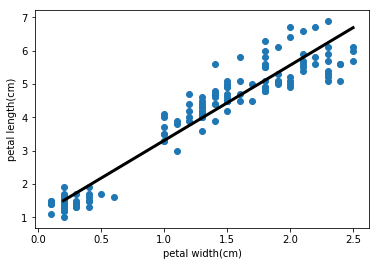

In [96]:


plt.scatter(X['petal width (cm)'].values, X['petal length (cm)'].values)
plt.plot(prediction_space, y_pred, color = 'black', linewidth = 3)
plt.ylabel('petal length(cm)')
plt.xlabel('petal width(cm)')
plt.show()

Porém, o R² dessa amostra em específico pode estar enviesado por uma particularidade da própria amostra. Podemos resolver esse problema com

## K-Fold Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score

In [92]:
cv_scores = cross_val_score(reg, X_test, y_test, cv = 3, scoring = 'r2')

In [93]:
print(cv_scores)

[0.7690215  0.94766509 0.92964681]


In [94]:
print(np.mean(cv_scores))

0.8821111352020203


In [127]:
print(cv_scores)

[0.7690215  0.94766509 0.92964681]


In [128]:
print(cv_scores.reshape(-1, 1))

[[0.7690215 ]
 [0.94766509]
 [0.92964681]]


In [131]:
type(cv_scores)

numpy.ndarray

In [5]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
df
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1
